In [80]:
from Transformation import Transformation
import numpy as np
import math

# Input

Number of nodes: 8
Number of edges: 18


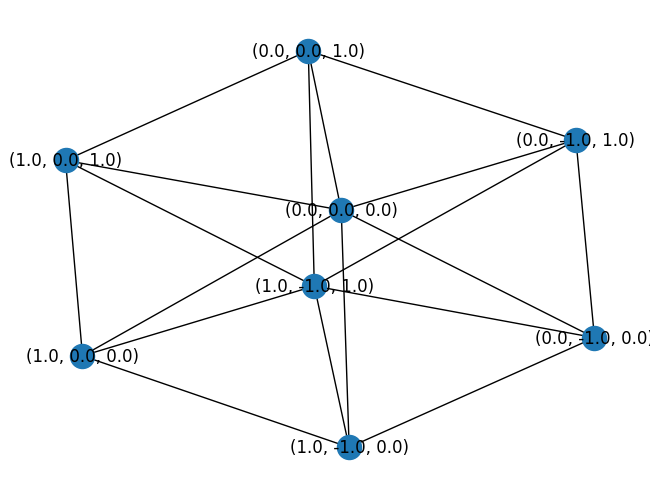

In [39]:
transformation = Transformation()

# Create objects
stl_file_path = "3d_models/stl/cube.stl"
mesh_data = transformation.stl_to_mesh(stl_file_path)
graph = transformation.mesh_to_graph(mesh_data)

transformation.print_graph_properties(graph, display_graph=True, display_labels=True)

In [44]:
graph._node

{(0.0, 0.0, 0.0): {'index_triangle': {0, 1, 2, 3, 8, 9}},
 (1.0, 0.0, 1.0): {'index_triangle': {0, 1, 4, 6}},
 (1.0, 0.0, 0.0): {'index_triangle': {0, 6, 7, 8}},
 (0.0, 0.0, 1.0): {'index_triangle': {1, 2, 4, 5}},
 (0.0, -1.0, 1.0): {'index_triangle': {2, 3, 5, 11}},
 (0.0, -1.0, 0.0): {'index_triangle': {3, 9, 10, 11}},
 (1.0, -1.0, 1.0): {'index_triangle': {4, 5, 6, 7, 10, 11}},
 (1.0, -1.0, 0.0): {'index_triangle': {7, 8, 9, 10}}}

# Point Sampler

In [119]:
class DevConv():
    def __init__(self, graph):
        self.graph = graph
        self.list_node = list(graph._node)

        self.W_phi = np.array([2])      #change
        self.W_theta = np.array([1, 2, 3])  # change
    
    def forward(self, previous_inclusion_score, is_relu=True):
        list_inc_score_before_function = np.zeros(shape=(len(self.list_node)))
        for index_current_node, (current_node, dict_neigh) in enumerate(self.graph._adj.items()):
            # print(index_current_node, " | ", current_node, " | ", dict_neigh)
            neigh_distances = np.zeros(shape=len(dict_neigh))
            for index_neigh, neigh_node in enumerate(dict_neigh.keys()):
                neigh_distances[index_neigh] = np.linalg.norm(np.multiply(self.W_theta, np.array(current_node) - np.array(neigh_node)))   # norm(W_theta * (xi - xj))
            # print(neigh_distances)
            list_inc_score_before_function[index_current_node] = self.W_phi * np.max(neigh_distances)
            # print(list_inc_score_before_function)

        # apply non linear function
        if is_relu:
            list_inc_score = np.maximum(list_inc_score_before_function, 0)
        else:
            list_inc_score = 1 / (1 + np.exp(-list_inc_score_before_function))

        # merge with previous inclusion score
        if previous_inclusion_score!=None:
            return np.mean(previous_inclusion_score, list_inc_score)
        return list_inc_score
            
            
            
            


In [120]:
devconv = DevConv(graph)
devconv.forward(previous_inclusion_score=None, is_relu=False)

C:\Users\Arthur\AppData\Local\Temp\ipykernel_7668\2751484858.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  list_inc_score_before_function[index_current_node] = self.W_phi * np.max(neigh_distances)


array([0.9992622 , 0.99821144, 0.9992622 , 0.99752738, 0.9992622 ,
       0.99821144, 0.9992622 , 0.99752738])